<center>
<h1>Supervised Learning: Non parametric models</h1>
<br />
<em>Support materials</em>
    <br /><br />
    Gilles Louppe (<a href="https://twitter.com/glouppe">@glouppe</a>)
    <br /><br />
    New York University
</center>

In [1]:
# Global imports and settings

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)

# Slideshow
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

In [17]:
%%javascript
Reveal.addEventListener("slidechanged", function(event){ window.location.hash = "header"; });

<IPython.core.display.Javascript object>

# Interactive growing of decision trees

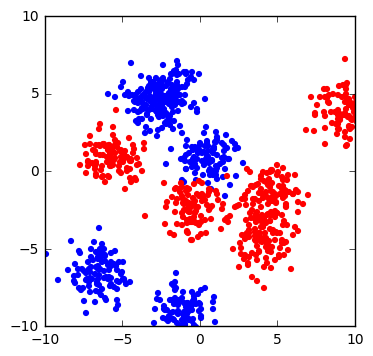

In [19]:
# Generate data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=10, random_state=123)
labels = ["b", "r"]
y = np.take(labels, (y < 5))

# Plot
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label, linewidths=0)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

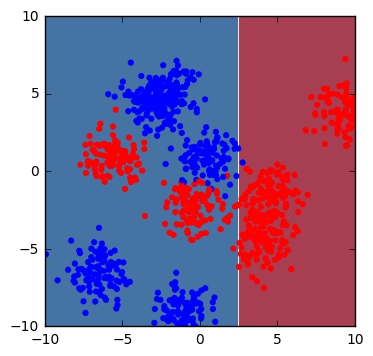

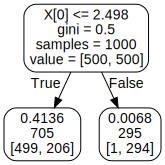

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from tutorial import plot_surface    
from graphviz import Source
from ipywidgets import interact, widgets
from IPython.display import display

@interact(n=widgets.IntSlider(min=2, max=20,step=1,value=2))
def plot_tree(n):
    clf = DecisionTreeClassifier(max_leaf_nodes=n)
    clf.fit(X, y)
    plot_surface(clf, X, y)
    display(Source(export_graphviz(clf, out_file=None, label="root", rounded=True)))